- ### Training :

- ### Importing Libraries:

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [114]:
from sklearn import model_selection, tree, metrics,svm
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score
from sklearn.preprocessing import Normalizer, StandardScaler
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from lightgbm import LGBMRegressor
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

- ### Import Train Data :

In [115]:
train = pd.read_csv(r"C:\Users\Akshay\Desktop\AKSHAY S\Big Mart Sale Pred Kaggle/train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- ### Regularizing The Categories in 'Item Fat Content' :

In [116]:
train.replace({'Low Fat':'Low Fat','low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular','Regular':'Regular'}, inplace = True)
train.replace({'Low Fat':0,'Regular':1} , inplace = True)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- ### Dividing 'Item Types' as 'Healthy','Unhealthy','Others' & Label 0,1,2 :

In [117]:
train['Item_Type'].replace({'Dairy':'Unhealthy', 'Soft Drinks':'Unhealthy', 'Meat':'Unhealthy', 'Fruits and Vegetables':'Healthy',
       'Household':'Healthy', 'Baking Goods':'Unhealthy', 'Snack Foods':'Unhealthy', 'Frozen Foods':'Healthy',
       'Breakfast':'Healthy', 'Health and Hygiene':'Healthy', 'Hard Drinks':'Unhealthy', 'Canned':'Unhealthy',
       'Breads':'Healthy', 'Starchy Foods':'Healthy', 'Others':'Others', 'Seafood':'Healthy'}, inplace = True)
train['Item_Type'].replace({'Unhealthy':0,'Healthy':1,'Others':2} , inplace = True)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,0,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,0,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,0,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,1,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,1,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- ### Filling missing values of 'Outlet size' by 'Median' & Label 0,1,2 :

In [118]:
train.Outlet_Size.fillna('Medium', inplace=True)
train.Outlet_Size.unique()
train['Outlet_Size'] = train['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})

In [119]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,0,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,0,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,0,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,1,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,1,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052


- ### Labeling 'Outlet Location Type' :

In [120]:
train.Outlet_Location_Type.unique()
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,0,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,0,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,0,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,1,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,1,53.8614,OUT013,1987,2,2,Supermarket Type1,994.7052


- ### Labeling 'Outlet_Type' as 0,1,2,3 :

In [121]:
train.Outlet_Type.unique()
train['Outlet_Type'] = train['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1, 'Supermarket Type2':2,'Supermarket Type3':3})

- ### Checking Correlation :

[]

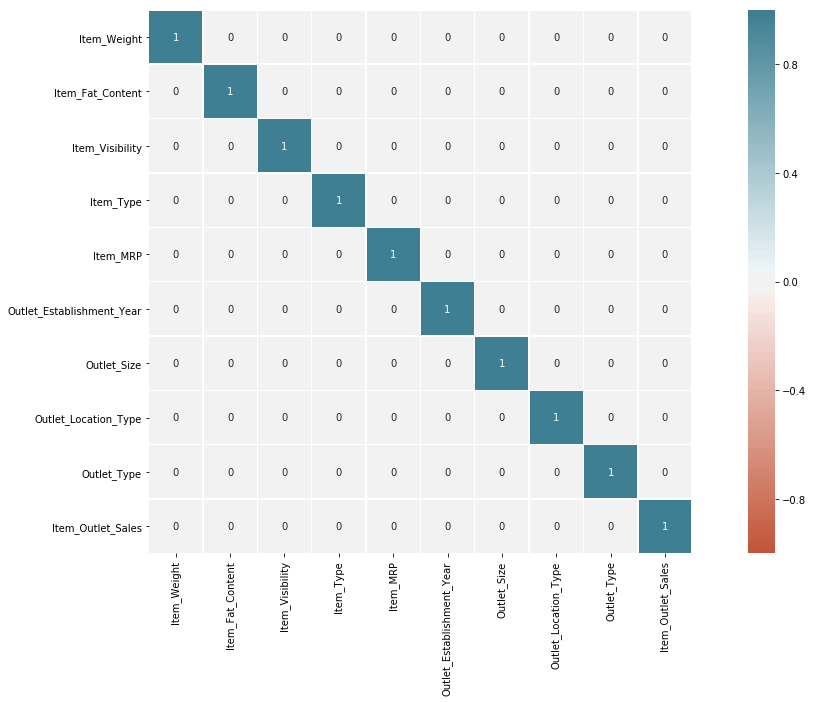

In [187]:
corr = train.corr()
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    corr>0.7, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5,annot=True
)
ax.plot()

[]

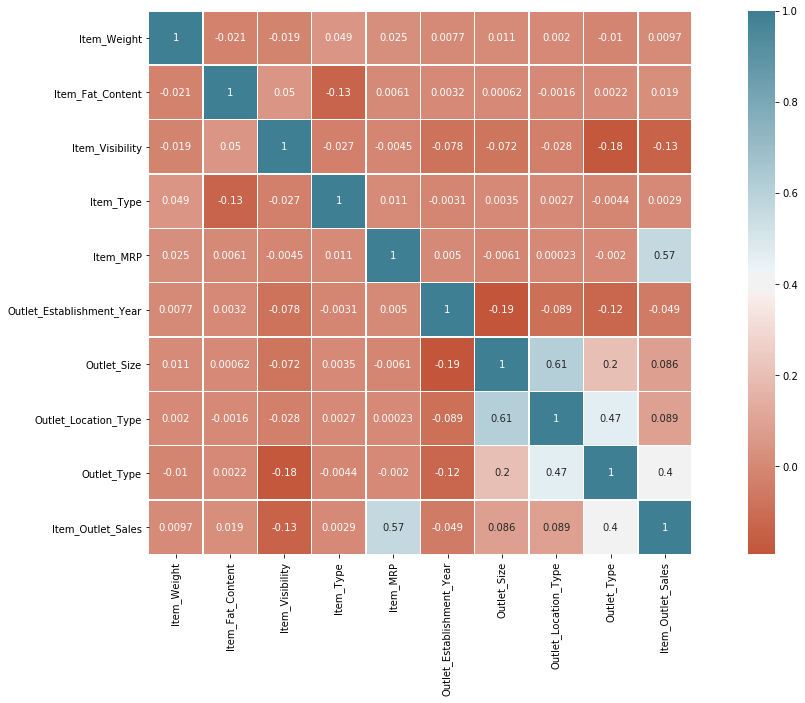

In [188]:
corr = train.corr()
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr,
    #vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5, annot=True
)
ax.plot()

- ### Scatter Plot of 'Item MRP' & 'Item Outlet Sales' :

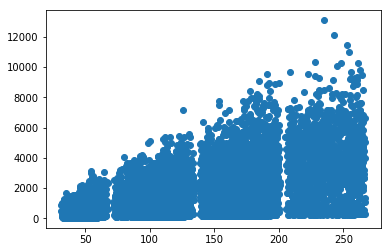

In [124]:
plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'])
plt.show()

- ### Fill missing values of 'Item_Weight' & Replacing 'Item_Visibility ==0.00000' by 'Median' :

In [125]:
train['Item_Weight'].fillna((train['Item_Weight'].median()), inplace=True)
train['Item_Visibility'] = train['Item_Visibility'].replace(0.000000, train['Item_Visibility'].median())

In [127]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,0,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,0,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,0,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.053931,1,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.053931,1,53.8614,OUT013,1987,2,2,1,994.7052


- ### Normalization :

In [128]:
def normalize(x):
    return (x-min(x))/(max(x)-min(x))
    

- ### Normalize 'Item_Weight' & 'Item_MRP' :

In [129]:
train['Item_Weight'] = normalize(train['Item_Weight'])
train['Item_MRP'] = normalize(train['Item_MRP'])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,0,0.016047,0,0.927507,OUT049,1999,1,0,1,3735.1380
1,DRC01,0.081274,1,0.019278,0,0.072068,OUT018,2009,1,2,2,443.4228
2,FDN15,0.770765,0,0.016760,0,0.468288,OUT049,1999,1,0,1,2097.2700
3,FDX07,0.871986,1,0.053931,1,0.640093,OUT010,1998,1,2,0,732.3800
4,NCD19,0.260494,0,0.053931,1,0.095805,OUT013,1987,2,2,1,994.7052


- ### Extracting Independant Variable - X :

In [130]:
X = train.drop(['Item_Identifier', 'Outlet_Identifier','Item_Outlet_Sales','Outlet_Establishment_Year'], axis=1)
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.282525,0,0.016047,0,0.927507,1,0,1
1,0.081274,1,0.019278,0,0.072068,1,2,2
2,0.770765,0,0.016760,0,0.468288,1,0,1
3,0.871986,1,0.053931,1,0.640093,1,2,0
4,0.260494,0,0.053931,1,0.095805,2,2,1


- ### Extracting Dependant Variable - y :

In [131]:
y = pd.DataFrame(train['Item_Outlet_Sales'], columns=['Item_Outlet_Sales'])
y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [133]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- ### Train Test Split :

In [134]:
from sklearn.model_selection import train_test_split 

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=2018)


In [135]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(5966, 8)
(5966, 1)
(2557, 8)
(2557, 1)


- ### Applying Model :

In [165]:
### Gradient Boosting Regressor :

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


params = {'n_estimators': 570,
          'max_depth':3,
          'min_samples_split': 7,
          'learning_rate': 0.008,
          'loss': 'ls'}

In [166]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math
from sklearn import datasets, ensemble


reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
y_pred3 = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test,y_pred3)


rmse = math.sqrt(mse)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (MSE) on test set: {:.4f}".format(rmse))
print("R2 Score : {:.4f}".format(r2))

The mean squared error (MSE) on test set: 1165365.6400
The root mean squared error (MSE) on test set: 1079.5210
R2 Score : 0.6006


- ### Score :

In [142]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (MSE) on test set: {:.4f}".format(rmse))
print("R2 Score : {:.4f}".format(r2))

The mean squared error (MSE) on test set: 1167528.0843
The root mean squared error (MSE) on test set: 1080.5221
R2 Score : 0.5999


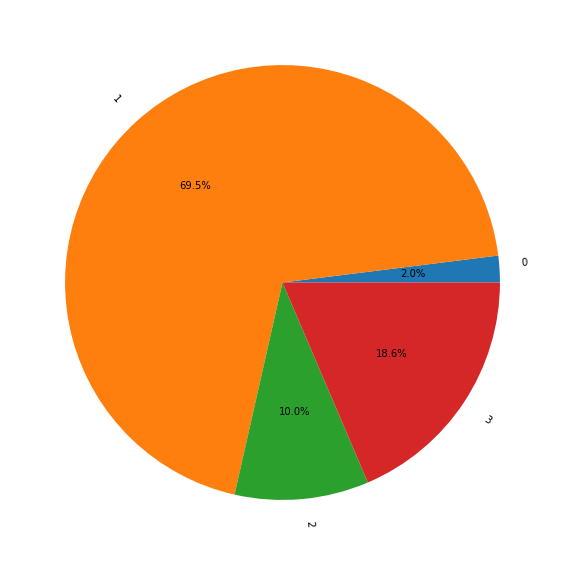

In [189]:
# Verify whether based on outlet Type sales 
sums = train['Item_Outlet_Sales'].groupby(train['Outlet_Type']).sum().reset_index(name='Sales')
# sums
plt.figure(figsize=(10,10))
plt.pie(sums['Sales'], labels=sums['Outlet_Type'], rotatelabels=True,autopct='%1.1f%%');
plt.show()

- ### Test Data :

- ### Importing Libraries :

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [168]:
from sklearn import model_selection, tree, metrics,svm
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score
from sklearn.preprocessing import Normalizer, StandardScaler
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from lightgbm import LGBMRegressor
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

- ### Importing Test Data :

In [169]:
test = pd.read_csv(r"C:\Users\Akshay\Desktop\AKSHAY S\Big Mart Sale Pred Kaggle/test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


- ### Regularizing The Categories of 'Item_Fat_Content' :

In [170]:
test.replace({'Low Fat':'Low Fat','low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular','Regular':'Regular'}, inplace = True)
test.replace({'Low Fat':0,'Regular':1} , inplace = True)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,1,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


- ### Dividing 'Item Types' as 'Healthy','Unhealthy','Others' & Labels 0,1,2 :

In [171]:
test['Item_Type'].replace({'Dairy':'Unhealthy', 'Soft Drinks':'Unhealthy', 'Meat':'Unhealthy', 'Fruits and Vegetables':'Healthy',
       'Household':'Healthy', 'Baking Goods':'Unhealthy', 'Snack Foods':'Unhealthy', 'Frozen Foods':'Healthy',
       'Breakfast':'Healthy', 'Health and Hygiene':'Healthy', 'Hard Drinks':'Unhealthy', 'Canned':'Unhealthy',
       'Breads':'Healthy', 'Starchy Foods':'Healthy', 'Others':'Others', 'Seafood':'Healthy'}, inplace = True)
test['Item_Type'].replace({'Unhealthy':0,'Healthy':1,'Others':2} , inplace = True)
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,0,0.007565,0,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,1,0.038428,0,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,0,0.099575,2,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,0,0.015388,0,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,1,0.118599,0,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,1,0.063817,1,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,1,0.082602,0,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,0,0.015782,0,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,1,0.123365,0,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,0,0.005698,0,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


- ### Filling missing values of 'Outlet size' by 'Median' & Label 0,1,2 :

In [172]:
test.Outlet_Size.fillna('Medium', inplace=True)
test.Outlet_Size.unique()
test['Outlet_Size'] = test['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})

In [173]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,0,0.007565,0,107.8622,OUT049,1999,1,Tier 1,Supermarket Type1
1,FDW14,8.300,1,0.038428,0,87.3198,OUT017,2007,1,Tier 2,Supermarket Type1
2,NCN55,14.600,0,0.099575,2,241.7538,OUT010,1998,1,Tier 3,Grocery Store
3,FDQ58,7.315,0,0.015388,0,155.0340,OUT017,2007,1,Tier 2,Supermarket Type1
4,FDY38,NaN,1,0.118599,0,234.2300,OUT027,1985,1,Tier 3,Supermarket Type3


- ### Labeling 'Outlet_Location_Type' :

In [174]:
test.Outlet_Location_Type.unique()
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})

- ### Labeling 'Outlet_Type' :

In [175]:
test.Outlet_Type.unique()
test['Outlet_Type'] = test['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1, 'Supermarket Type2':2,'Supermarket Type3':3})

- ### Checking Correlation :

[]

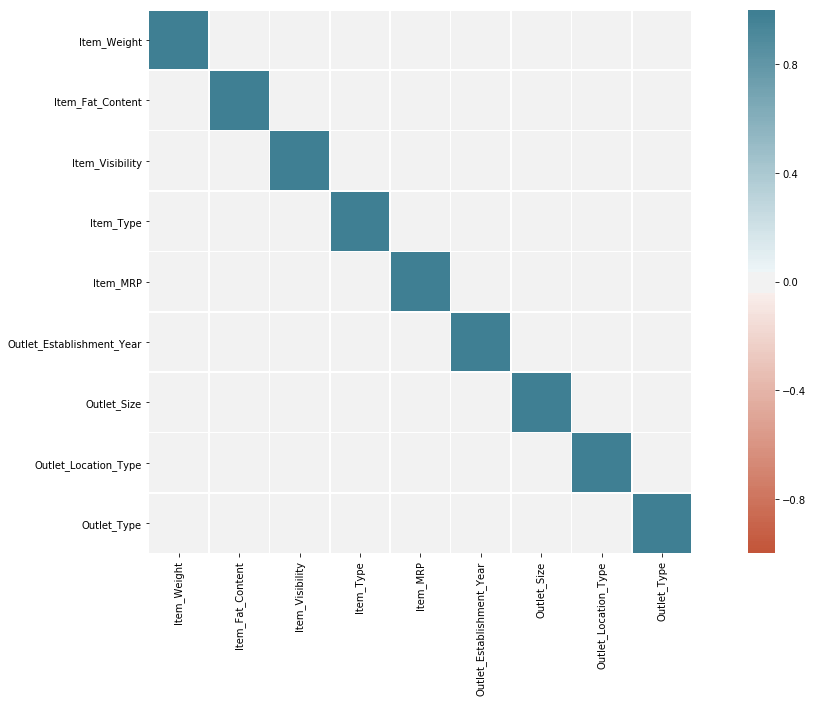

In [176]:
corr = test.corr()
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    corr>0.9, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5
)
ax.plot()

[]

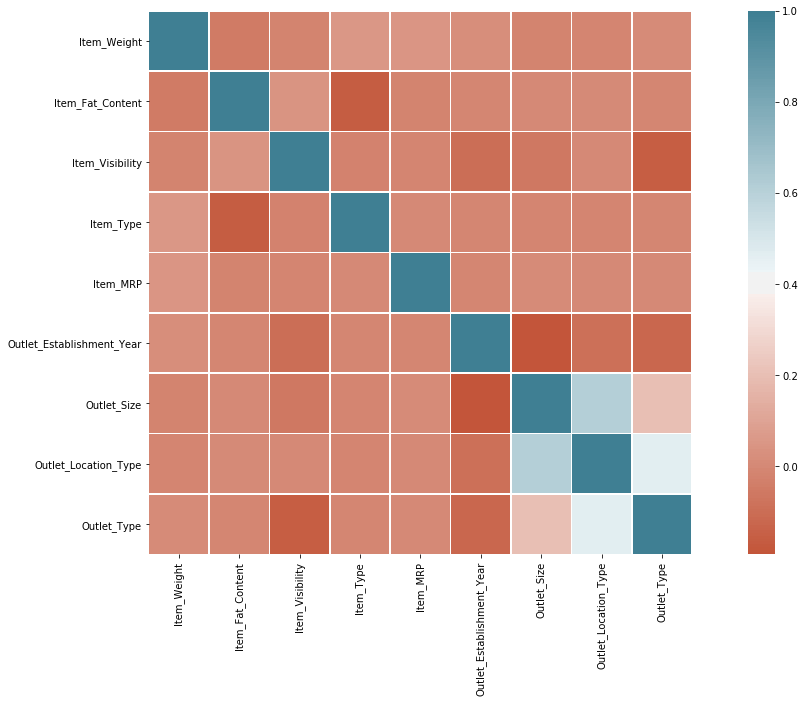

In [177]:
corr = test.corr()
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr,
    #vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5
)
ax.plot()

- ### Fill missing values of 'Item_Weight' & Replacing 'Item_Visibility ==0.00000' by 'Median' :

In [178]:
test['Item_Weight'].fillna((test['Item_Weight'].median()), inplace=True)
test['Item_Visibility'] = test['Item_Visibility'].replace(0.000000, test['Item_Visibility'].median())

In [179]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

- ### Normalization :

In [180]:
def normalize(x):
    return (x-min(x))/(max(x)-min(x))
    

- ### Normalize 'Item_Weight' & 'Item_MRP' :

In [181]:
test['Item_Weight'] = normalize(test['Item_Weight'])
test['Item_MRP'] = normalize(test['Item_MRP'])
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,0.964275,0,0.007565,0,0.323413,OUT049,1999,1,0,1
1,FDW14,0.222983,1,0.038428,0,0.235849,OUT017,2007,1,1,1
2,NCN55,0.598095,0,0.099575,2,0.894140,OUT010,1998,1,2,0
3,FDQ58,0.164335,0,0.015388,0,0.524488,OUT017,2007,1,1,1
4,FDY38,0.473057,1,0.118599,0,0.862069,OUT027,1985,1,2,3


- ### Extracting Independant Variable - X1 :

In [182]:
X1 = test.drop(['Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year'], axis=1)
X1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.964275,0,0.007565,0,0.323413,1,0,1
1,0.222983,1,0.038428,0,0.235849,1,1,1
2,0.598095,0,0.099575,2,0.894140,1,2,0
3,0.164335,0,0.015388,0,0.524488,1,1,1
4,0.473057,1,0.118599,0,0.862069,1,2,3


- ### Appplying Model :

In [183]:
### Gradient Boosting Regressor :

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
params = {'n_estimators': 570,
          'max_depth':3,
          'min_samples_split': 7,
          'learning_rate': 0.008,
          'loss': 'ls'}

In [184]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
y_pred_test = reg.predict(X1)

In [185]:
sales_test1 = pd.read_csv("test.csv")

Item_Identifier = sales_test1['Item_Identifier']

Outlet_Identifier = sales_test1['Outlet_Identifier']


In [ ]:
submission=pd.DataFrame({'Item_Identifier':Item_Identifier, 'Outlet_Identifier':Outlet_Identifier,'Item_Outlet_Sales':y_pred_test})
submission.to_csv("sample_submission2.csv",index=False)